In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv(r'C:\Users\SHYAM SASHANK\OneDrive\Desktop\NFLX.csv')

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


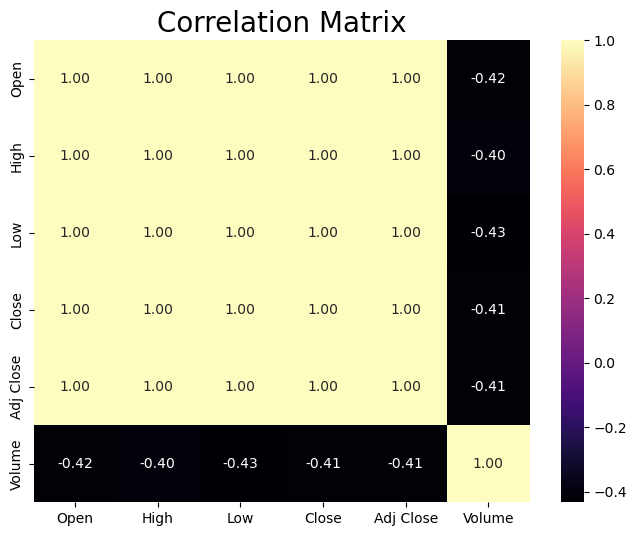

In [12]:
%matplotlib inline
f,ax=plt.subplots()
f.set_size_inches(8,6)
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="magma")
ax.set_title("Correlation Matrix",fontsize=20)
plt.show()

In [13]:
df.Date= pd.to_datetime(df.Date)
df2 =df.set_index('Date')

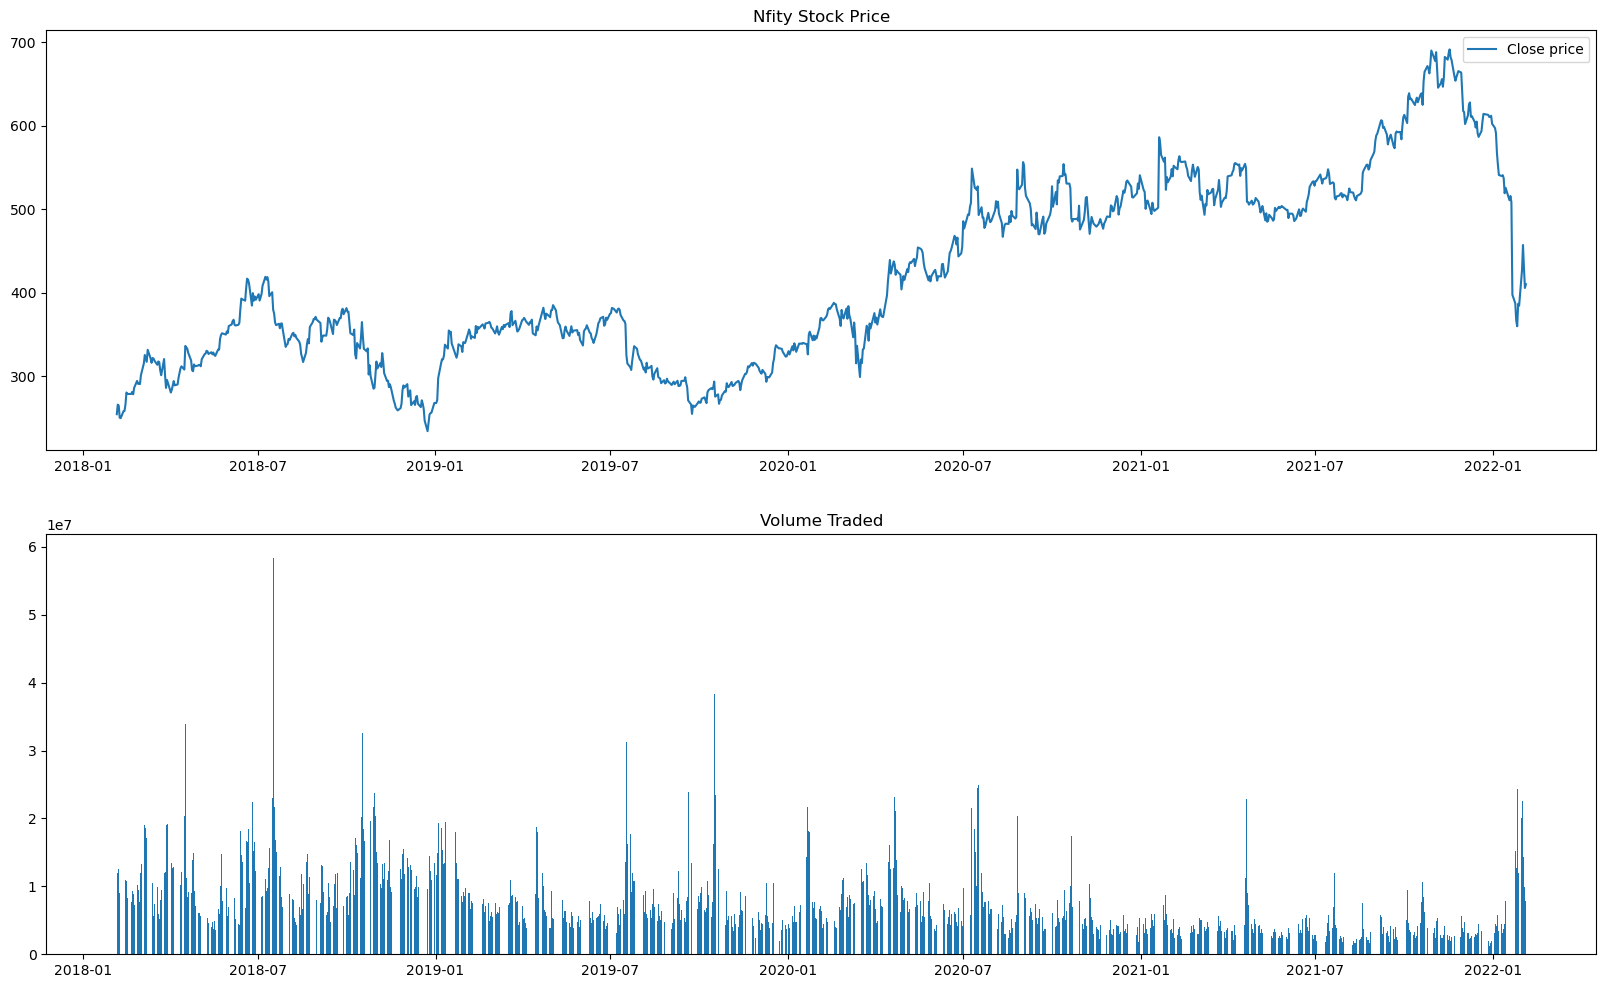

In [14]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Nfity Stock Price')
plt.plot(df2.Close,label='Close price')
plt.legend()
plt.subplot(2, 1, 2)
plt.title('Volume Traded')
plt.bar(x=df2.index,height=df2['Volume'])
plt.show()

In [15]:
data = list(df2["Close"])

In [16]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  -1.8125906878289957
2. P-Value :  0.3742289256820758
3. Num Of Lags :  6
4. Num Of Observations Used For ADF Regression: 1002
5. Critical Values :
	 1% :  -3.436893045520188
	 5% :  -2.8644287878535146
	 10% :  -2.568308127138936


In [17]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [18]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [19]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

909 100


In [20]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7710.734, Time=1.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7707.609, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7706.977, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7707.056, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7705.806, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7707.853, Time=0.62 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.324 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1009
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3851.903
Date:                Sun, 19 Mar 2023   AIC                           7705.806
Time:                        11:08:56   BIC                           7710.722
Sample:                             0   HQIC                          7707.674
          

In [21]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(5,2,0))

In [22]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1009
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -3935.548
Date:                Sun, 19 Mar 2023   AIC                           7883.097
Time:                        11:08:56   BIC                           7912.585
Sample:                             0   HQIC                          7894.301
                               - 1009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8607      0.025    -33.855      0.000      -0.911      -0.811
ar.L2         -0.6590      0.030    -21.836      0.000      -0.718      -0.600
ar.L3         -0.4631      0.030    -15.500      0.000      -0.522      -0.405
ar.L4         -0.2422      0.025     -9.734      0.000      -0.291      -0.193
ar.L5         -0.1314      0.017     -7.683      0.000      -0.165      -0.098
sigma2       145.1139      2.761     52.558      0.000     139.702     150.525
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):              4308.34
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               2.32   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([574.65611543, 578.63950515, 582.70742029, 588.04384678,
       573.3889926 , 570.42429684, 591.60333672, 594.42540865,
       594.55192538, 594.79527242, 584.72128458, 601.85237861,
       613.55929329, 616.76855139, 607.1798186 , 640.78765544,
       647.99302202, 637.49764033, 638.38264942, 628.14592126,
       626.68033129, 628.84609952, 632.81948462, 628.30156064,
       639.0917725 , 641.16718045, 625.17748252, 656.52733068,
       669.9118115 , 678.77644791, 676.53527202, 666.70438168,
       680.34449993, 695.31876757, 684.67647173, 680.00623717,
       691.36459299, 668.33113651, 640.98091587, 644.52787663,
       649.65993195, 641.85916786, 654.26310883, 685.1277127 ,
       685.26304991, 694.71314344, 698.7904852 , 686.57036903,
       681.94910574, 655.33655219, 648.15933081, 652.78362529,
       660.55373078, 662.17050174, 637.70995603, 611.0470171 ,
       608.09578899, 591.0634927 , 603.01643628, 620.85276151,
       626.61526618, 612.22294727, 610.92907124, 603.72

In [24]:
s = pd.Series(pred, index =df2.index[-100:])
s

Date
2021-09-15    574.656115
2021-09-16    578.639505
2021-09-17    582.707420
2021-09-20    588.043847
2021-09-21    573.388993
                 ...    
2022-01-31    367.886195
2022-02-01    432.775388
2022-02-02    471.973867
2022-02-03    441.650811
2022-02-04    415.308401
Length: 100, dtype: float64

<AxesSubplot:xlabel='Date'>

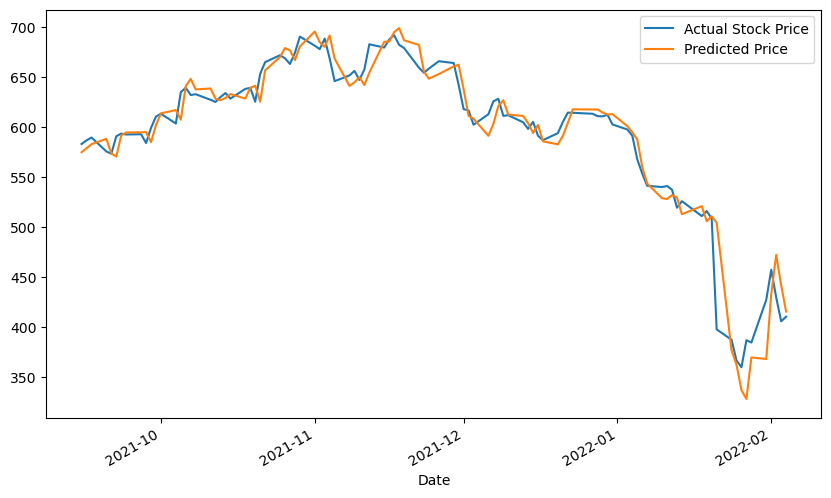

In [25]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

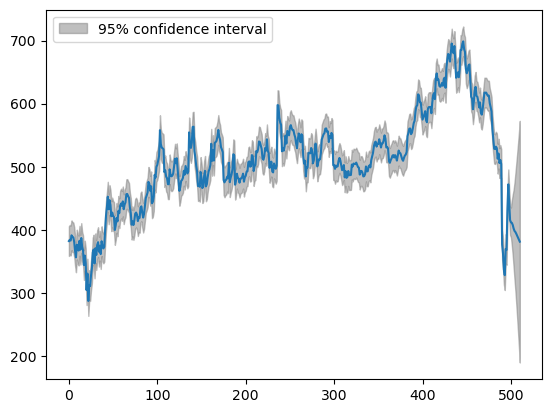

In [26]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, start = len(data)-500, end = len(data)+10, dynamic = False);

In [27]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

18.81222342462003

In [28]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.9453768232527273

In [29]:
pred_future = model.predict(start=end,end=end+10)
pred_future

array([415.30840098, 411.62928137, 410.91344172, 407.60592894,
       402.01686523, 398.12175411, 396.40784688, 393.67033894,
       390.485199  , 387.2393232 , 384.06382622])

In [30]:
import datetime
start_date = datetime.datetime(2022,2,4)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(11)]

In [31]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2022-02-04    415.308401
2022-02-05    411.629281
2022-02-06    410.913442
2022-02-07    407.605929
2022-02-08    402.016865
2022-02-09    398.121754
2022-02-10    396.407847
2022-02-11    393.670339
2022-02-12    390.485199
2022-02-13    387.239323
2022-02-14    384.063826
dtype: float64

<AxesSubplot:xlabel='Date'>

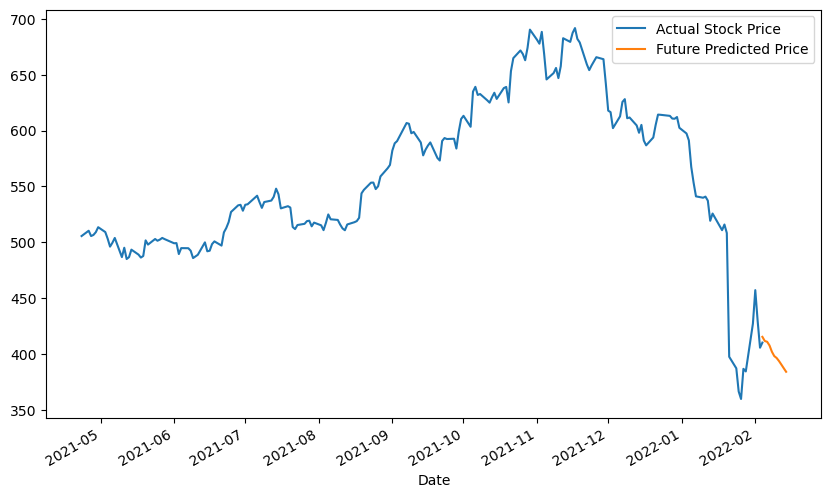

In [32]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)

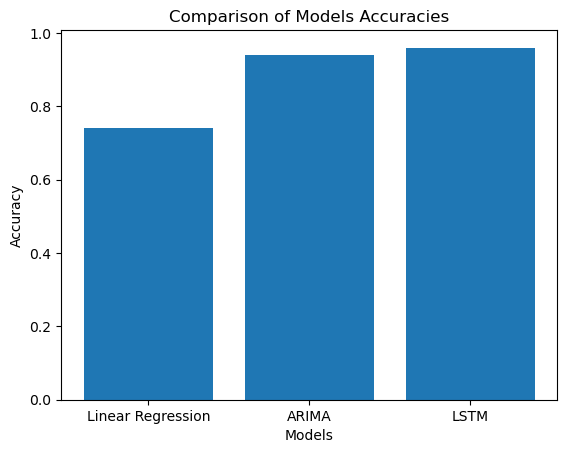

In [33]:
import matplotlib.pyplot as plt

models=['Linear Regression','ARIMA','LSTM']
accuracies=[0.74,0.94,0.96]

plt.bar(models,accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Models Accuracies')
plt.show()